# Facial Keypoint Detection Kaggle Competition

Kaggle competition to detect eyes, mouth and nose in grayscaled images.

In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 1

/Users/purzelrakete/anaconda/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [15]:
%aimport keypoints
%aimport plots
%aimport data
%aimport pipeline
%aimport submit

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [5]:
(X, Y, header) = data.df_train()

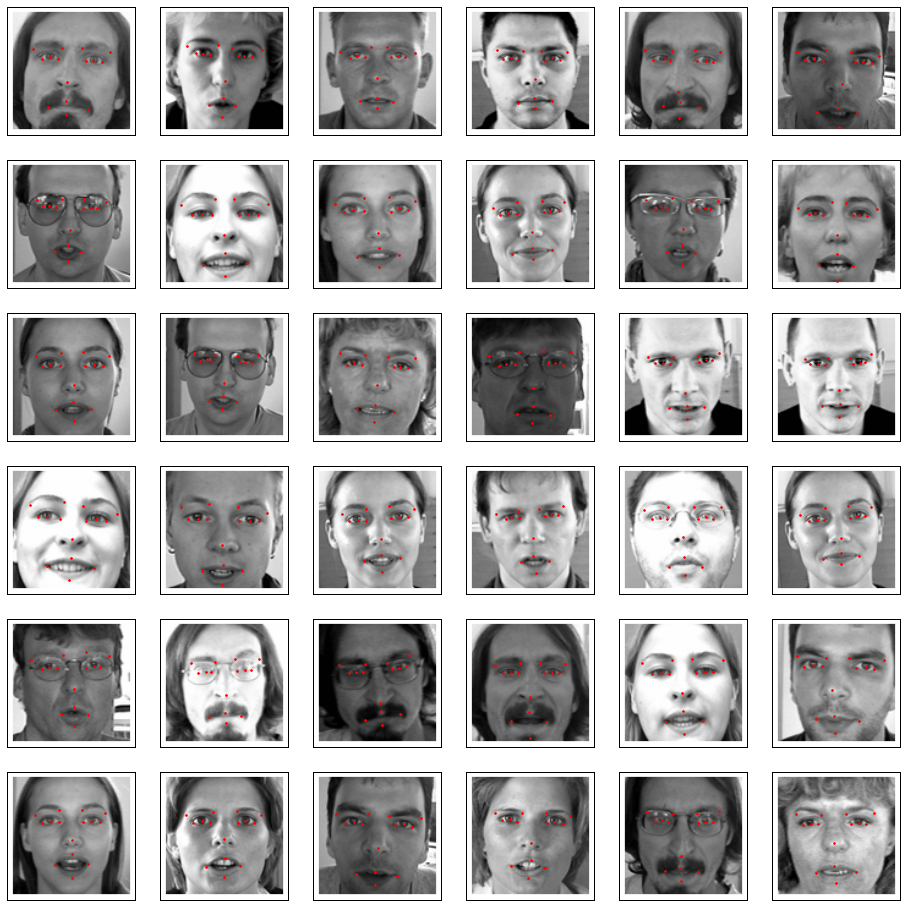

In [7]:
plots.show_imgs(X, Y)

In [12]:
p = pipeline.Pipeline('data/training.csv', 'data/test.csv', 'data/IdLookupTable.csv', 'results')
estimator = p.train(p.model(), X, Y)
Xtest = data.df_predict()

In [13]:
Ytest = p.predict(estimator, Xtest)

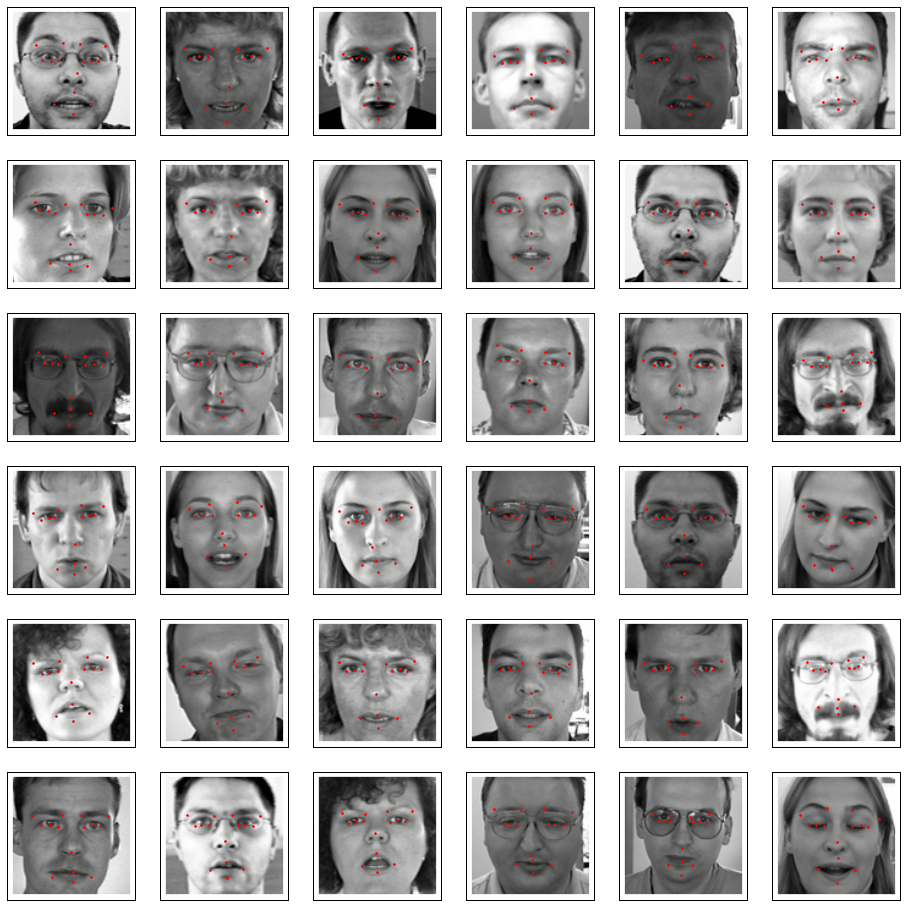

In [14]:
plots.show_imgs(Xtest, Ytest)

In [16]:
lookup = data.df_lookup(header)
S = submit.submission(Ytest, lookup)

In [17]:
S.describe()

,RowId,Location
count,27124.000000,27124.000000
mean,13562.500000,48.598836
std,7830.168687,17.873121
min,1.000000,0.000000
25%,6781.750000,35.184563
50%,13562.500000,45.066408
75%,20343.250000,63.158866
max,27124.000000,96.000000


In [21]:
p.evaluate(estimator, X, Y)

In [22]:
p.evaluation

{'lower_confidence_bound': 1.9471863569981149,
 'mean': 2.7060059692283676,
 'std': 0.75881961223025263,
 'upper_confidence_bound': 3.4648255814586202,
 'values': '2.10887737267,2.07646175904,1.9874494473,2.05757885024,2.06366464273,2.5169795533,2.97355447248,3.40434104246,4.07182722332,3.79932532875'}

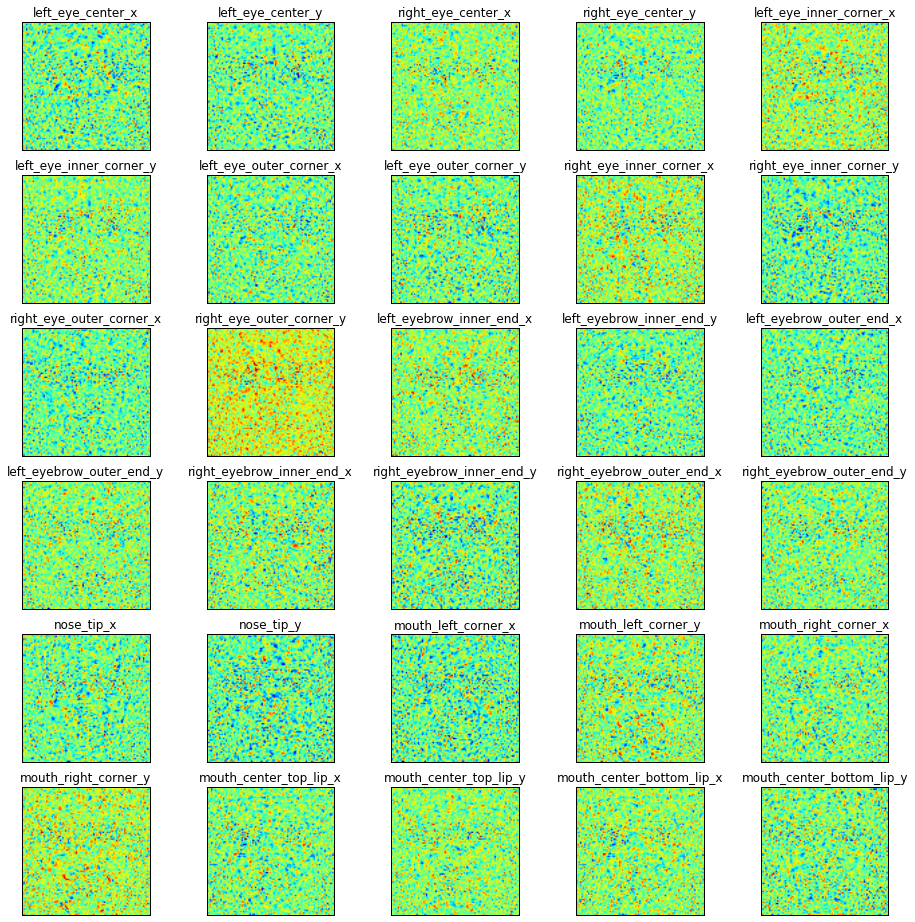

In [18]:
plots.show_model(estimator, header)